# Appendix C - Prophet Model Fitting

## Loading

In [8]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet

In [9]:
pred_gen = pd.read_csv('/Users/nickwawee/Desktop/BGSU/MSA_6450/Project/Data/aggregated_ac.csv')
pred_gen.drop('Unnamed: 0', axis =1 , inplace = True )

In [10]:
pred_gen.DATE_TIME = pd.to_datetime(pred_gen.DATE_TIME)

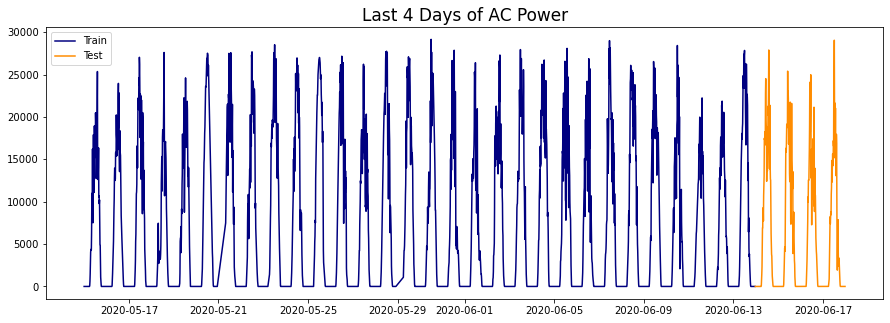

In [11]:
train=pred_gen[:(pred_gen.shape[0] - 384)]
test=pred_gen[-384:]
plt.figure(figsize=(15,5))
plt.plot(train.DATE_TIME, train.Sum_AC, label='Train',color='navy')
plt.plot(test.DATE_TIME, test.Sum_AC, label='Test',color='darkorange')
plt.title('Last 4 Days of AC Power',fontsize=17)
plt.legend()
plt.show()

In [15]:
trainnew = pd.DataFrame({'ds': train.DATE_TIME, 'y': train.Sum_AC})
m = Prophet()
m.fit(trainnew)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [16]:
fut = pd.DataFrame(columns = ['ds'])
fut['ds'] = pd.concat([test.DATE_TIME, train.DATE_TIME], axis = 0)
fut

,ds
2773,2020-06-13 23:30:00
2774,2020-06-13 23:45:00
2775,2020-06-14 00:00:00
2776,2020-06-14 00:15:00
2777,2020-06-14 00:30:00
...,...
2768,2020-06-13 22:15:00
2769,2020-06-13 22:30:00
2770,2020-06-13 22:45:00
2771,2020-06-13 23:00:00


In [17]:
forecast = m.predict(fut)

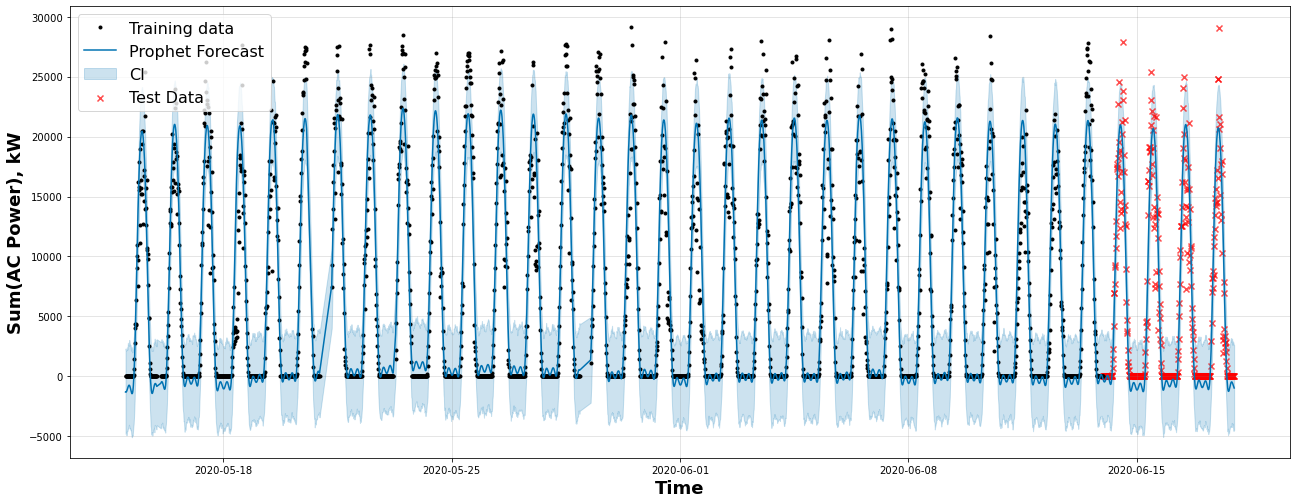

In [18]:
m.plot(forecast,figsize=(18,7))
plt.title('ok')
plt.scatter(x = test.DATE_TIME, y = test.Sum_AC, marker = 'x', color = 'red', alpha = 0.7)
plt.legend(labels=['Training data','Prophet Forecast', 'CI','Test Data'], prop={'size': 16})
plt.title('', fontweight = 'bold', fontsize = 20)
plt.xlabel('Time', fontweight = 'bold', fontsize = 18)
plt.ylabel('Sum(AC Power), kW',fontweight = 'bold', fontsize = 18 )
plt.savefig('/Users/nickwawee/Desktop/BGSU/MSA_6450/Project/Plots/Prophet.png', dpi = 600)
plt.show()


In [19]:
rmse = np.sqrt(np.mean((forecast.yhat - test.Sum_AC)**2))

In [20]:
rmse

2890.653827175155